In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ta  # technical analysis library

# Load the AAPL historical data
df_aapl = pd.read_csv("../data/MSFT_historical_data.csv")

# Preview the structure
df_aapl.head()

df_aapl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9672 entries, 0 to 9671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9672 non-null   object 
 1   Open          9672 non-null   float64
 2   High          9672 non-null   float64
 3   Low           9672 non-null   float64
 4   Close         9672 non-null   float64
 5   Adj Close     9672 non-null   float64
 6   Volume        9672 non-null   int64  
 7   Dividends     9672 non-null   float64
 8   Stock Splits  9672 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 680.2+ KB


Convert Date and Set Index

In [2]:
# Convert 'Date' column to datetime format
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])

# Set 'Date' as the index
df_aapl.set_index('Date', inplace=True)

# Sort the index (just in case)
df_aapl.sort_index(inplace=True)

# Preview the changes
df_aapl.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


Technical Indicators

In [3]:
# Make a working copy
df_aapl_indicators = df_aapl.copy()

# Calculate 20-day and 50-day Simple Moving Averages (SMA)
df_aapl_indicators['SMA_20'] = ta.trend.sma_indicator(df_aapl_indicators['Close'], window=20)
df_aapl_indicators['SMA_50'] = ta.trend.sma_indicator(df_aapl_indicators['Close'], window=50)

# Calculate RSI (Relative Strength Index)
df_aapl_indicators['RSI_14'] = ta.momentum.rsi(df_aapl_indicators['Close'], window=14)

# Calculate MACD and Signal line
macd = ta.trend.macd(df_aapl_indicators['Close'])
macd_signal = ta.trend.macd_signal(df_aapl_indicators['Close'])

df_aapl_indicators['MACD'] = macd
df_aapl_indicators['MACD_signal'] = macd_signal

# Preview result
df_aapl_indicators[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_signal']].tail()


,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_signal
Date,,,,,,
2024-07-24,428.899994,451.887498,438.804000,36.980921,-0.684986,3.013510
2024-07-25,418.399994,450.199498,438.897599,31.696381,-2.740453,1.862718
2024-07-26,425.269989,448.820497,439.071799,37.944660,-3.771598,0.735855
2024-07-29,426.730011,447.809497,439.144800,39.217239,-4.420024,-0.295321
2024-07-30,422.920013,446.118997,439.183400,37.080269,-5.181612,-1.272579


Plot Close Price with SMA

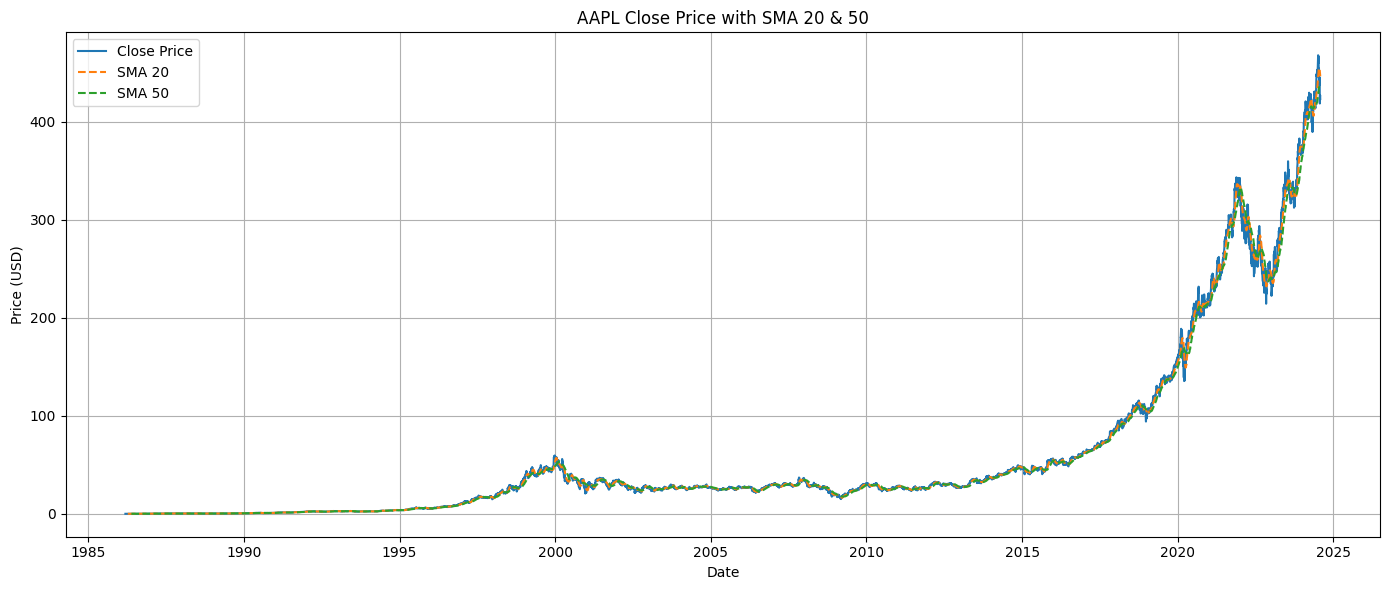

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(df_aapl_indicators['Close'], label='Close Price', linewidth=1.5)
plt.plot(df_aapl_indicators['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(df_aapl_indicators['SMA_50'], label='SMA 50', linestyle='--')
plt.title("AAPL Close Price with SMA 20 & 50")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Plot RSI

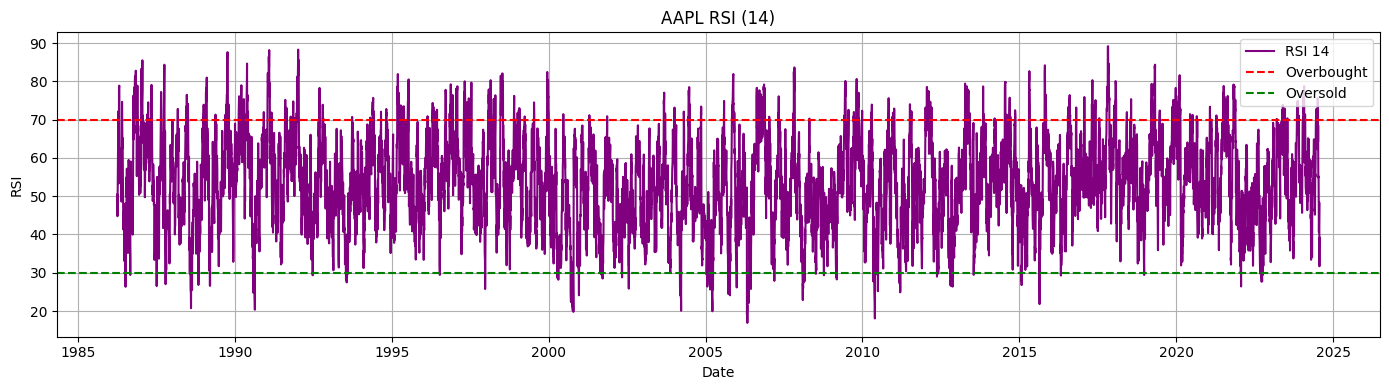

In [5]:
plt.figure(figsize=(14, 4))
plt.plot(df_aapl_indicators['RSI_14'], color='purple', label='RSI 14')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title("AAPL RSI (14)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Plot MACD and Signal Line

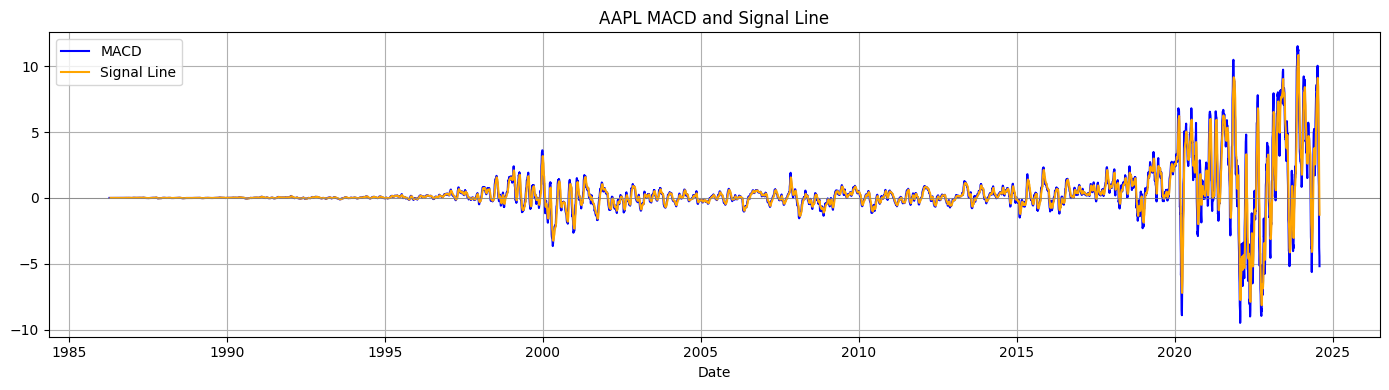

In [6]:
plt.figure(figsize=(14, 4))
plt.plot(df_aapl_indicators['MACD'], label='MACD', color='blue')
plt.plot(df_aapl_indicators['MACD_signal'], label='Signal Line', color='orange')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title("AAPL MACD and Signal Line")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
